## Overview

#### This project is to analyse the house pricing in melbourne and related features

#### The objective of this notebook is to analyze the data of melbourne housing prices and its related features, and to be able to conclude the relationships in well performed model. To summarize, the goals of this notebook are to be concluded as two use cases:
>**_1. The model that explains the pricing by its related features_**

>**_2. The melbourne housing markets trend between 2016-2017._**

#### The goals are expected to meet common interests of certain stakeholders(Buyers&Sellers, Bank, Government, Agents and general public).
#### This notebook will perform data preprocession before stepping into the features analyzing and model building. 
#### With cleaned dataset, to achieve the goals, this notebook will examine features which obviously related to the housing prices. According to the domain knowledge, it will primarily focus on the the features that has obvious relathionshp with property price. Various visualization will be used for better presentation of data throughout the notebook during examining the relationship between these features and pricing. 
#### Features that will be explore are listed as follows:
>**_Price_**

>**_Type_**

>**_Location_**
>>**_Region_**

>>**_Council_**

>>**_Suburb_**

>>**_Distance_**

>**_Other features_**

>>**_Rooms_**

>>**_Bathrooms_**

>>**_Car_**

>>**_Landsize_**


#### This notebook is designed as sections of short and long answered questions, which helps to deduct the useful informations for the goals proposed above. 


In [1]:
## Import library to support the analysis
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## _Section 1: Data preprocession_

#### Check the data(scan the head and tail)

In [2]:
## Read in file
melb_house = pd.read_csv('file/melb_data.csv')
melb_house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
melb_house.tail()

#### Check the datatype to understand the value in each column 

In [89]:
## Check data info for each column
melb_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    13573 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#### Do we have missing values in the data, if so, where are these missing values locating at?

In [ ]:
## Check missing values
melb_house.isnull().sum()

##### Based on our domain knowledge, the missing value in building area and built year requires further reference to be able to fill them, which is out of scope in the data available here. 

##### The council area can be filled with cross matching the full column 'Suburb'. This column can still be taken into consideration of pricing analysis if there is no more missing values after filled. 

#### Filling the missing values in CouncilArea

In [ ]:
pd.set_option('display.max_rows', 500)
melb_house.loc[melb_house['CouncilArea'].isna()][['Suburb','CouncilArea']]

In [3]:
melb_house_ref = melb_house.groupby(['Suburb', 'CouncilArea'])['Address'].count().reset_index(name='count')    
## Check if there is 0 in the reference 
melb_house_ref['count'].unique()

array([ 55,  40,  61,   4,  64,  38,  25,   7,  69,  49,   2,  86, 125,
        53,  45,  73,   1, 101, 151,  12,   5,  11,  15, 131, 234,   8,
        13,  54,  44, 176, 124,  17, 208,  80, 102,  65,  10,  14,   3,
        51,  48, 138,   9,  35,  34,  26,  52,  62,  31,  24,   6,  16,
       108,  27,  22,  59,  19,  20,  96,  84, 126, 117, 144,  21, 115,
        18, 186,  50,  76,  74,  23,  97, 100, 111, 157,  30,  28,  90,
        92,  46,  33, 139,  60, 129, 175,  58,  43, 161, 113, 228, 323,
       251, 160, 109,  81, 132,  99,  37,  29, 154])

In [29]:
melb_house_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       338 non-null    object
 1   CouncilArea  338 non-null    object
 2   count        338 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.0+ KB


In [4]:
## transfer the dataframe to dictionary
dict_suburb = dict([(i, [x]) for i, x in zip(melb_house_ref['Suburb'], melb_house_ref['CouncilArea'])])

In [ ]:
## check the reference dictonary
print(dict_suburb)

In [5]:
## check the column without string to fill later
def isNaN(string):
    return string != string

In [6]:
## fill the empty cell with reference dictionary
for r, row in enumerate(melb_house['CouncilArea'].values):
    if isNaN(row) and melb_house['Suburb'][r] in dict_suburb:
        melb_house['CouncilArea'][r] = dict_suburb[melb_house['Suburb'][r]]

/var/folders/xr/ky408_2s4cg35xypxtpvnbgr0000gn/T/ipykernel_23483/580825837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_house['CouncilArea'][r] = dict_suburb[melb_house['Suburb'][r]]


In [7]:
### check the columns after filling
melb_house.loc[melb_house['CouncilArea'].isna()][['Suburb', 'CouncilArea']]

,Suburb,CouncilArea
12251,Burnside,NaN
12438,Attwood,NaN
12865,Wallan,NaN
13245,New Gisborne,NaN
13264,Plumpton,NaN
13381,Burnside,NaN
13494,Monbulk,NaN


#### Is there still missing value in council area after filling?

In [8]:
melb_house['CouncilArea'].isnull().sum()

7

#### What are the values in column car?

In [ ]:
## Check the values in Column Car
melb_house['Car'].unique()

In [7]:
car = melb_house['Car'].reset_index()
car.groupby('Car').agg('count')

,index
Car,
0.0,1026
1.0,5509
2.0,5591
3.0,748
4.0,506
5.0,63
6.0,54
7.0,8
8.0,9


#### what the house type of the property that have missing car values?

In [8]:
## prepared dataframe
car_na = melb_house[melb_house['Car'].isna()][['Type']].reset_index()

In [9]:
car_na.groupby('Type').agg('count')

,index
Type,
h,60
u,2


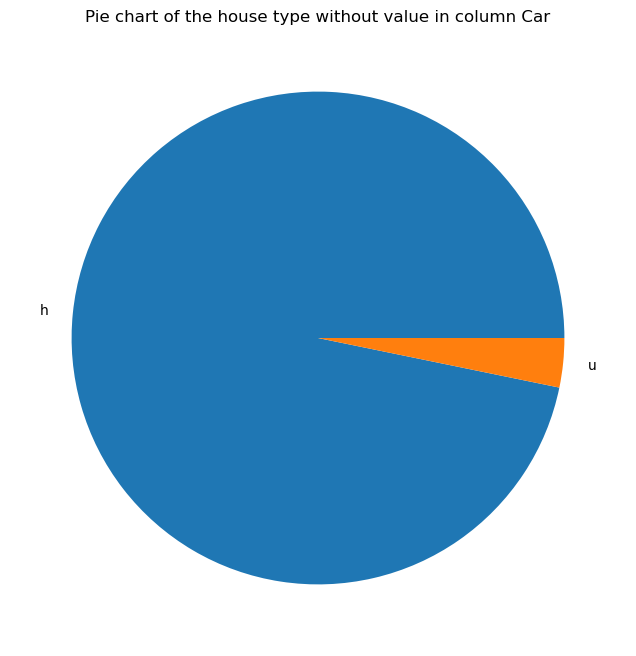

In [12]:
## apply pie chart to visualize the house type without value in car column. 
car_grouped = car_na.groupby('Type').size()
car_grouped.plot(kind='pie', subplots = True, figsize=(8,8))
plt.title('Pie chart of the house type without value in column Car')
plt.ylabel('')
plt.show()

#### We can conclude that the missing values in car include property types of both unit and house. Based on the domain knowledge, the house has at least the street parking space, we can fill them as 1 car space. As for unit, no reference can be made without supporting data, we can use 0 to fill here as it is a very low portion in this data, also because the car space does not alter the pricing of unit much based on the domain knowledge. 

#### Filling the missing value in column 'Car'

In [10]:
melb_house.loc[(melb_house['Type'] == 'h') & (melb_house['Car'].isna()), 'Car']=1
melb_house.loc[(melb_house['Type'] == 'u') & (melb_house['Car'].isna()), 'Car']=0

In [11]:
## check the cells in 'car' after filling 
melb_house['Car'].isna().sum()

0

In [ ]:
melb_house.isnull().sum()

### Analysis

#### After basic information fill of the dataset. Now the column car is filled and only very small proportion of the council column is missing, which cannot be filled without further research on their councilArea. Fortunately, this dataset includes other features that is highly related to price based on domain knowledge, which can be analysed and involved in solving use cases. 

#### Next section will continue on exploring the available features and their relationship with price.

## _Section 2: Features analyzing_

### Price

##### How is price distributed?

In [15]:
melb_house['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

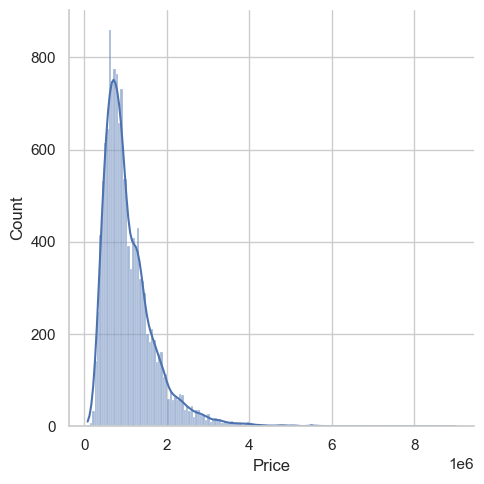

In [16]:
sns.set_theme(style="whitegrid")
sns.displot(data=melb_house, x="Price", kde=True)

##### It is right-skewed due to a few extremely high price properties.

In [12]:
##subsetting the dataset to avoid the impact of outliers(extremely high price)
melb_before4m = melb_house[melb_house['Price']<=4000000].reset_index()
melb_after4m = melb_house[melb_house['Price']>4000000].reset_index()
melb_before3m = melb_house[melb_house['Price']<=3000000].reset_index()
melb_after3m = melb_house[melb_house['Price']>3000000].reset_index()

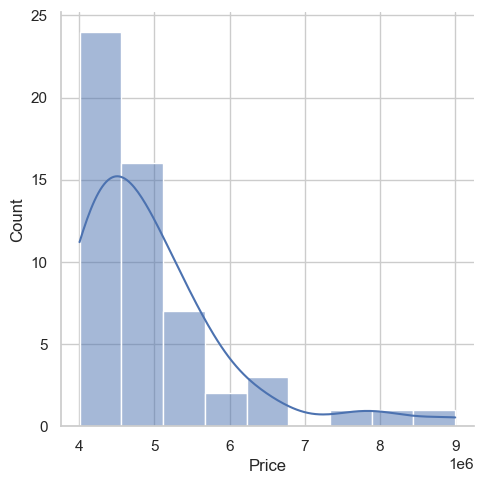

In [28]:
## check the graph after 4m.
sns.displot(data=melb_after4m, x="Price", kde=True)

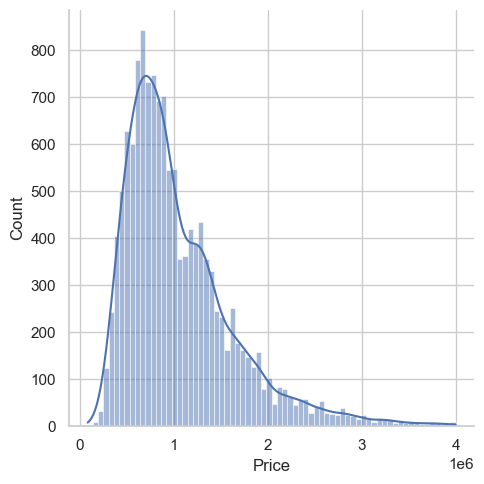

In [27]:
## check the price distribution before 4m
sns.displot(data=melb_before4m, x="Price", kde=True)


##### The distribution of price still slightly right-skewed. Try 3m.

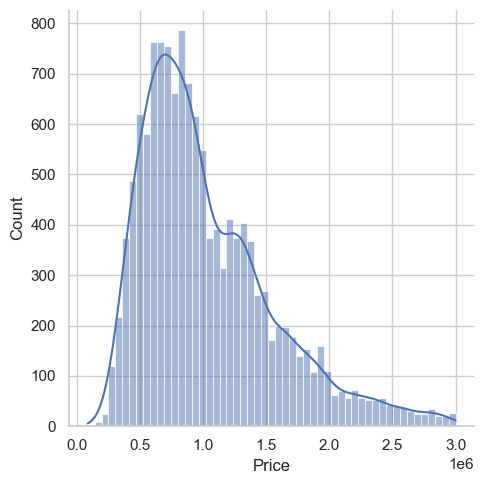

In [31]:
## check the price distribution within 3m
sns.displot(data=melb_before3m, x="Price", kde=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          221 non-null    int64  
 1   Suburb         221 non-null    object 
 2   Address        221 non-null    object 
 3   Rooms          221 non-null    int64  
 4   Type           221 non-null    object 
 5   Price          221 non-null    float64
 6   Method         221 non-null    object 
 7   SellerG        221 non-null    object 
 8   Date           221 non-null    object 
 9   Distance       221 non-null    float64
 10  Postcode       221 non-null    float64
 11  Bedroom2       221 non-null    float64
 12  Bathroom       221 non-null    float64
 13  Car            221 non-null    float64
 14  Landsize       221 non-null    float64
 15  BuildingArea   138 non-null    float64
 16  YearBuilt      148 non-null    float64
 17  CouncilArea    221 non-null    object 
 18  Lattitude 

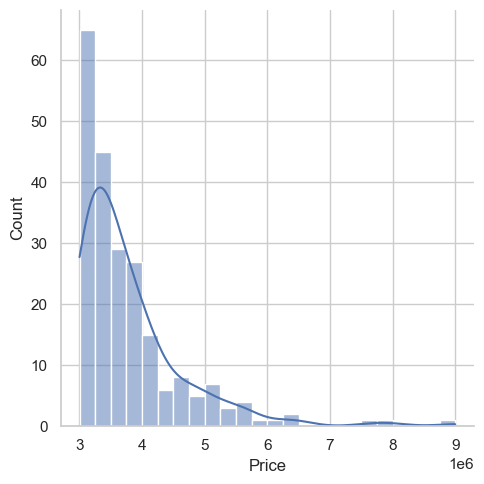

In [33]:
## check the price distribution after 3m
sns.displot(data=melb_after3m, x="Price", kde=True)
melb_after3m.info()

##### The distribution looks bell shape alike now. This notebook will continue discuss other features and their realtionship with price based on the subsets above.

### House Type

##### How many types there are and how are they distributed?

In [18]:
melb_house.groupby(['Type'])['Type'].count().reset_index(name='count') 

,Type,count
0,h,9449
1,t,1114
2,u,3017


<AxesSubplot:xlabel='Type', ylabel='count'>

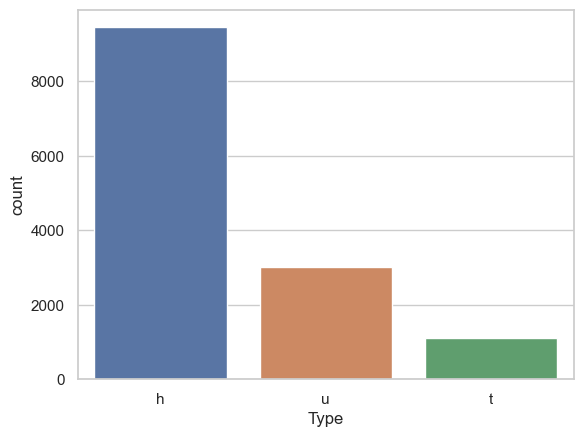

In [19]:
##visualize the distribution
sns.countplot(x=melb_house['Type'])

In [20]:
melb_house.groupby('Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,9449.0,1.242665e+06,668078.742092,131000.0,792000.0,1080000.0,1500000.0,9000000.0
t,1114.0,9.337351e+05,395038.245773,300000.0,670000.0,846750.0,1101900.0,3475000.0
u,3017.0,6.051275e+05,260987.452871,85000.0,440000.0,560000.0,706000.0,3625000.0


<AxesSubplot:xlabel='Type', ylabel='Price'>

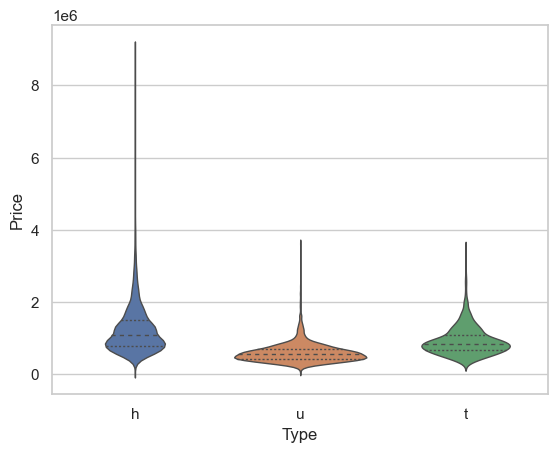

In [39]:
sns.violinplot(data=melb_house, x="Type", y="Price",
               split=False, inner="quart", linewidth=1)

In [34]:
melb_before3m.groupby('Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,9231.0,1.182286e+06,529471.289058,131000.0,785000.0,1060000.0,1460000.0,3000000.0
t,1112.0,9.293443e+05,381536.601267,300000.0,670000.0,845500.0,1100250.0,2900000.0
u,3016.0,6.041262e+05,255169.133334,85000.0,439750.0,560000.0,706000.0,2460000.0


<AxesSubplot:xlabel='Type', ylabel='Price'>

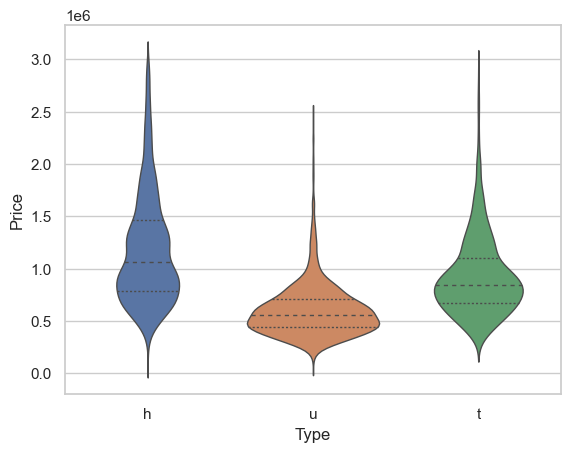

In [38]:
sns.violinplot(data=melb_before3m, x="Type", y="Price",
               split=False, inner="quart", linewidth=1)

##### We can see from the graphs and tables above that there are obvious difference on price with different type of house. It is much more clear with the subset within 3m of the price. 

### Regionname

#### How does price distributed within different regions?

In [42]:
melb_house['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [43]:
### check the property sold based on regions
melb_before3m.groupby('Regionname')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Regionname,,,,,,,,
Eastern Metropolitan,1465.0,1.094181e+06,441197.173381,288000.0,775000.0,1009000.0,1323000.0,2850000.0
Eastern Victoria,53.0,6.999808e+05,165498.190135,400000.0,608500.0,670000.0,780000.0,1085000.0
Northern Metropolitan,3874.0,8.870698e+05,408635.093727,145000.0,600000.0,805000.0,1095000.0,3000000.0
Northern Victoria,41.0,5.948293e+05,217761.670461,330000.0,427500.0,540000.0,745000.0,1355000.0
South-Eastern Metropolitan,449.0,9.049548e+05,333457.466589,266000.0,665000.0,850000.0,1067000.0,2950000.0
Southern Metropolitan,4501.0,1.268337e+06,640472.939194,131000.0,720000.0,1210000.0,1700000.0,3000000.0
Western Metropolitan,2944.0,8.628932e+05,382470.892533,85000.0,600000.0,791000.0,1030000.0,2910000.0
Western Victoria,32.0,3.975234e+05,86211.956532,280500.0,339750.0,400000.0,427000.0,710000.0


<Figure size 1000x1000 with 0 Axes>

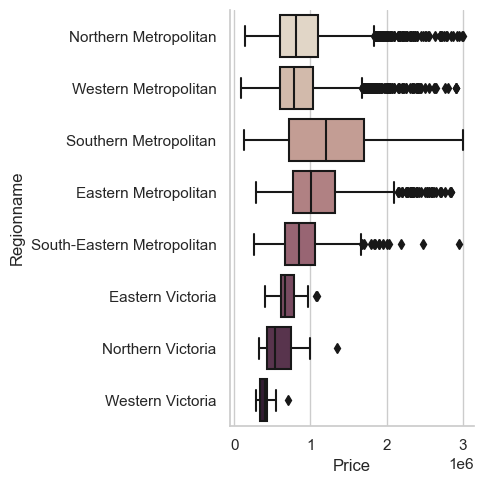

In [41]:
## visualize the price interval of different regions 
plt.figure(figsize = (10,10))
sns.catplot(data=melb_before3m, x="Price", y="Regionname", kind="box", palette="ch:.25")


##### As we can see from both graph and table, within different regions, price varies a lot as well as their mean, max and min values. Hence region has important impact on the price.

<AxesSubplot:xlabel='Price', ylabel='Regionname'>

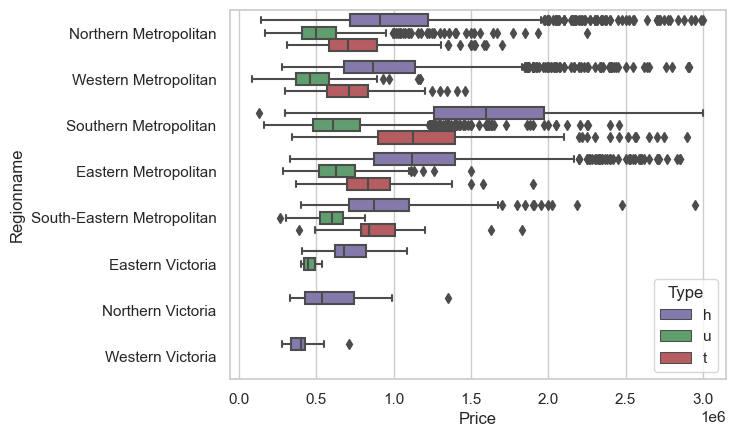

In [46]:
## combine the type with region on price
sns.boxplot(x="Price", y="Regionname",
            hue="Type", palette=["m", "g", "r"],
            data=melb_before3m)

##### From the graph above, we can see the house type affect the price within different regions. Regions like northern victoria and western victoria only have type house here, and eastern victoria doesnot have townhouse. Their price and average of price vary significantly within same region or inter-regions. Hence region has huge impact on price.

### Council

##### How is Council Area distributed?

In [17]:
## check the council area column
melb_before3m['CouncilArea'].describe()

count        13359
unique          65
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

In [18]:
## check if there is missing value 
melb_before3m['CouncilArea'].isna().sum()

0

In [15]:
## fill the missing value
melb_before3m['CouncilArea'].fillna('unknown', inplace=True)

In [16]:
## check missing value after filling
melb_before3m['CouncilArea'].isna().sum()

0

##### How does council area spread on various regions?

In [28]:
melb_council_before3m = melb_before3m.groupby(['CouncilArea', 'Regionname'])['Address'].count().reset_index(name='count')



TypeError: unhashable type: 'list'

In [59]:
melb_before3m.groupby('CouncilArea').describe()

TypeError: unhashable type: 'list'

### Suburb

#### How is suburb distributed and how it impact on price?

In [84]:
### prepre dataframe for visualisation
suburb_before3m= melb_before3m.groupby(['Suburb'])['Address'].count().reset_index(name='count')

suburb_before3m

,Suburb,count
0,Abbotsford,56
1,Aberfeldie,43
2,Airport West,67
3,Albanvale,6
4,Albert Park,65
...,...,...
309,Wonga Park,1
310,Wyndham Vale,4
311,Yallambie,24
312,Yarra Glen,1


##### since there are too many suburbs, we set threshold at 50 when visualizing.

In [58]:
## visualize property sold based on different suburb
suburb_treemap = suburb_before3m[suburb_before3m['count']>50]
fig = px.treemap(suburb_treemap, path=['Suburb'], values='count') 
fig.show()

##### What are the top prices in different suburbs?

In [76]:
df = melb_before3m.groupby('Suburb')['Price'].agg('max')
df

Suburb
Abbotsford      1876000.0
Aberfeldie      2905000.0
Airport West    1250000.0
Albanvale        655000.0
Albert Park     2950000.0
                  ...    
Wonga Park       900000.0
Wyndham Vale     500000.0
Yallambie       1670000.0
Yarra Glen       620000.0
Yarraville      2450000.0
Name: Price, Length: 314, dtype: float64

### Distance

##### How is distance distributed along price?


In [66]:
melb_house['Distance'].describe()

count    13580.000000
mean        10.137776
std          5.868725
min          0.000000
25%          6.100000
50%          9.200000
75%         13.000000
max         48.100000
Name: Distance, dtype: float64

In [67]:
melb_before3m['Distance'].describe()

count    13359.000000
mean        10.181234
std          5.893518
min          0.000000
25%          6.200000
50%          9.300000
75%         13.000000
max         48.100000
Name: Distance, dtype: float64

<AxesSubplot:xlabel='Distance', ylabel='Price'>

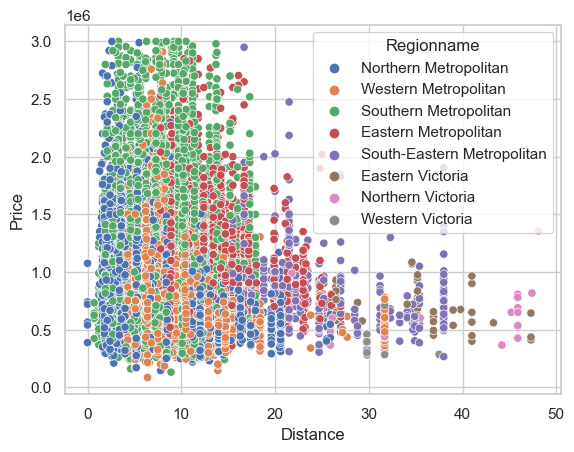

In [87]:
sns.scatterplot(x="Distance", y="Price", hue='Regionname', data=melb_before3m)


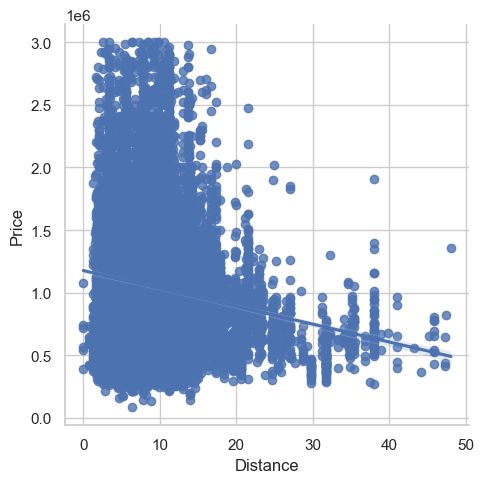

In [88]:
sns.lmplot(x="Distance", y="Price", data=melb_before3m)

##### The price is heavily concentrated on 0-20m in distance. It also varies a lot at the same distance, which is partialy contributed by different regions. Hence we conclude that distance alone does not make a useful predictor on price.

### Rooms

##### How is price spread along the room numbers?

In [92]:
melb_before3m['Rooms'].unique()

array([ 2,  3,  4,  1,  6,  5,  8,  7, 10])

In [41]:
melb_before3m.groupby('Rooms')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Rooms,,,,,,,,
1,681.0,4.338245e+05,224985.701208,85000.0,325000.0,385000.0,460000.0,2450000.0
2,3643.0,7.707758e+05,336044.779116,190000.0,535000.0,690000.0,911000.0,2920000.0
3,5848.0,1.060958e+06,453167.235292,283000.0,725000.0,948000.0,1310000.0,3000000.0
4,2578.0,1.349081e+06,578380.761279,131000.0,895000.0,1255000.0,1700000.0,3000000.0
5,528.0,1.614040e+06,639987.188238,355000.0,1073750.0,1527250.0,2100000.0,3000000.0
6,63.0,1.623532e+06,595447.113609,506000.0,1135000.0,1666000.0,2000000.0,2835000.0
7,9.0,1.684111e+06,616863.729774,1005000.0,1300000.0,1350000.0,2000000.0,2705000.0
8,8.0,1.602750e+06,830626.398741,741000.0,853250.0,1515000.0,2212500.0,2950000.0
10,1.0,9.000000e+05,NaN,900000.0,900000.0,900000.0,900000.0,900000.0


##### Significantly small number of property after room number is greater than 6.

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

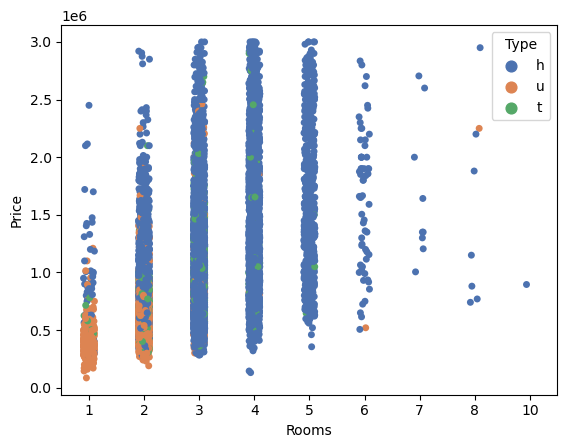

In [39]:

sns.stripplot(y="Price", x="Rooms", hue = "Type", palette="deep", data=melb_before3m)


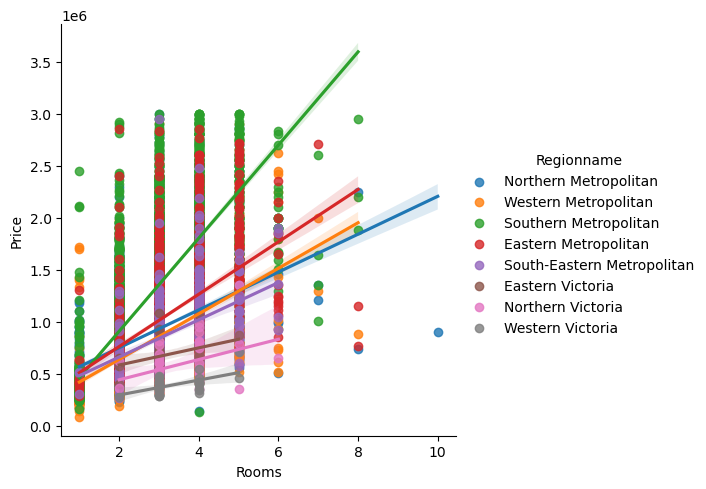

In [53]:
sns.lmplot(x="Rooms", y="Price", hue = "Regionname", data=melb_before3m)

##### The patterns on both with type and regionname is generally fanning. Price is overall increasing along the room numbers. Moreover, each color shows different patterns. The analysis will carry on with subsets of different types of property.

In [55]:
## subsetting dataset of prices within 3m
melb_house_3m = melb_before3m[melb_before3m['Type']=='h'].reset_index()
melb_unit_3m = melb_before3m[melb_before3m['Type']=='u'].reset_index()
melb_townhouse_3m = melb_before3m[melb_before3m['Type']=='t'].reset_index()

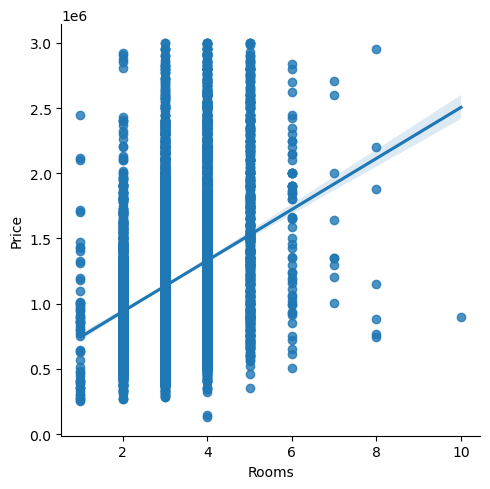

In [48]:
## In type house set. 
sns.lmplot(x="Rooms", y="Price", data=melb_house_3m)


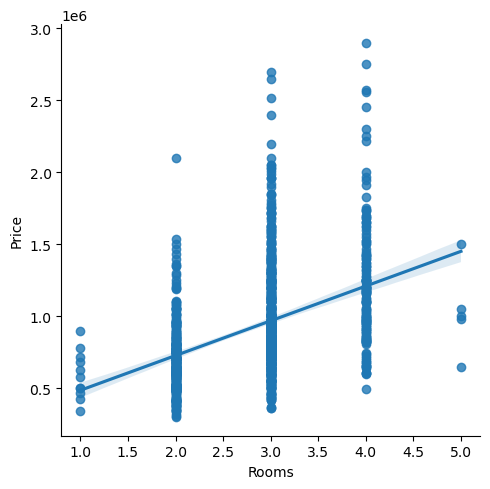

In [50]:
sns.lmplot(x="Rooms", y="Price", data=melb_townhouse_3m)

### Bathrooms

### Car

In [ ]:
melb_house['Rooms'].unique()

In [ ]:
melb_house['Bedroom2'].unique()

In [ ]:
melb_house.groupby('Bedroom2')['Price'].describe()

In [ ]:
melb_house.groupby('Rooms')['Price'].describe()

### Landsize

In [ ]:
melb_house['Bathroom'].unique()

In [ ]:
melb_house.groupby('Bathroom')['Price'].describe()

### Method

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x=melb_house['Method'])

## _Section 3: Use Case 1- Features affecting Price_

## _Section 4: Use Case 2- Housing Market Trend(16-17)_